In [11]:
import numpy as np
import matplotlib.pyplot as plt
import copy

### Problem 1

In [2]:
X_1 = np.random.normal(0,1,size=(100,1))             #generate a bunch of randomly selected X's
Y_1 = 2*(X_1) + np.random.normal(0,1,size=(100,1)) #Y = 2x + noise

Y_2 = 2*(X_1) + np.random.exponential(1,size=(100,1)) #generating noise with an exponential distribution, strictly positive

weight 1: 2.0684571371362552


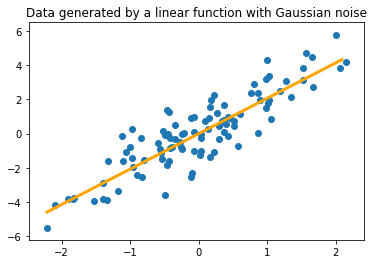

In [8]:
w_1 = (1.0/np.dot(X_1.T, X_1))[0,0]*X_1.T.dot(Y_1)[0,0] #closed form OLS solution for single dim

plt.plot(np.arange(np.min(X_1),np.max(X_1),0.1), w_1*np.arange(np.min(X_1),np.max(X_1),0.1), color="orange", lw=3)
plt.title("Data generated by a linear function with Gaussian noise")
plt.scatter(X_1, Y_1)
print("weight 1: " + str(w_1))
plt.show()

weight 2: 1.9757145705799255


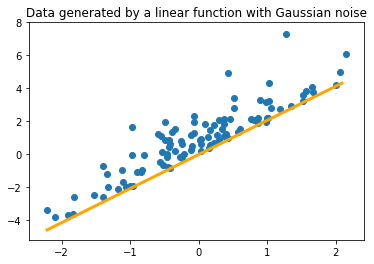

In [9]:
w_2 = (1.0/np.dot(X_1.T, X_1))[0,0]*X_1.T.dot(Y_2)[0,0] #closed form OLS solution for single dim

plt.plot(np.arange(np.min(X_1),np.max(X_1),0.1), w_1*np.arange(np.min(X_1),np.max(X_1),0.1), color="orange", lw=3)
plt.title("Data generated by a linear function with Gaussian noise")
plt.scatter(X_1, Y_2)
print("weight 2: " + str(w_2))
plt.show()

Comments: Gaussian noise values are 0 mean centered and can be positive or negative. Exponential noise values are strictly positive, centered 1, this skews the solution of the least squares problem.

### Problem 2

In [14]:
X_h = np.random.uniform(0,3,size=(10,1))             #generate a bunch of randomly selected X's
Y_h = 5*(X_h) + np.random.normal(0,1,size=(10,1))   #Y = 2x + noise

Y_outlier = copy.copy(Y_h)                           #create a copy of the original Y vector 
Y_outlier[6] = 50.0                                 #the new outlier value is much larger than the rest

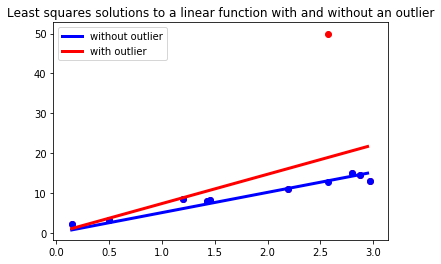

In [16]:
w = (1.0/np.dot(X_h.T, X_h))[0,0]*X_h.T.dot(Y_h)[0,0] 
w_outlier = (1.0/np.dot(X_h.T, X_h))[0,0]*X_h.T.dot(Y_outlier)[0,0] 

plt.title("Least squares solutions to a linear function with and without an outlier")
plt.plot(np.arange(np.min(X_h),np.max(X_h),0.1), w*np.arange(np.min(X_h),np.max(X_h),0.1), color="blue", lw=3, label="without outlier")
plt.plot(np.arange(np.min(X_h),np.max(X_h),0.1), w_outlier*np.arange(np.min(X_h),np.max(X_h),0.1), color="red", lw=3, label="with outlier")
plt.scatter(X_h, Y_outlier, color="red")
plt.scatter(X_h, Y_h, color="blue")
plt.legend()
plt.show()

### Problem 3

In [28]:
#load the data
data = np.loadtxt("homework_1_data.txt")
X_b = np.expand_dims(data[:,0], axis=1) #notice I'm fixing the shape of the vector from (1000,) to (1000,1) by calling expand_dims
Y_b = np.expand_dims(data[:,1], axis=1)

In [26]:
w_next = np.random.normal(0,1,size=(1,1))  #pick a random place to start w and store previous values
step_size = 0.0001                         #this is how much we update w by

i = 0
max_iter = 10000                           #a maximum number of iterations will be our stopping criterion

while i < max_iter:
    w_next -= step_size*2*np.sin(X_b).T.dot(np.sin(X_b).dot(w_next) - Y_b) #basis function is sin(x)
    i += 1

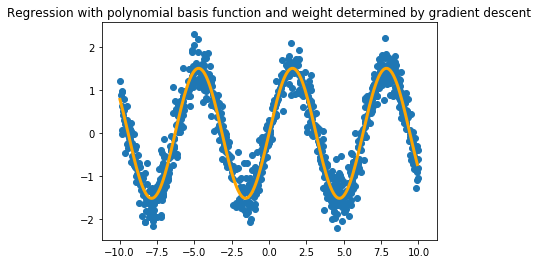

In [27]:
plt.plot(np.arange(np.min(X_b),np.max(X_b),0.1), (w_next*np.sin(np.arange(np.min(X_b),np.max(X_b),0.1)))[0,:], color="orange", lw=3)
plt.title("Regression with polynomial basis function and weight determined by gradient descent")
plt.scatter(X_b,Y_b)
plt.show()